# DTW-based alignment in FUCCIphase

This notebook explains the **dynamic time warping (DTW) alignment** used in
FUCCIphase (and in the CALIPERS workflow) to align FUCCI trajectories to a
reference cell-cycle template.

In this notebook you will:

- build or load a reference FUCCI trajectory,
- use DTW to align individual cell traces to the reference,
- visualise alignment paths and discuss their interpretation,
- see how alignment improves phase estimation and comparison across cells.

Use this notebook if you want to understand the algorithmic details behind
FUCCIphase, or if you are curious about how DTW is applied in this context.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from fucciphase.phase import (
    estimate_percentage_by_subsequence_alignment,
)
from fucciphase.plot import plot_dtw_query_vs_reference

## Read the reference curve

In [3]:
reference_file = "../example_data/hacat_fucciphase_reference.csv"
reference_df = pd.read_csv(reference_file)
# add a fake TRACK_ID
reference_df["TRACK_ID"] = 1
timestep = reference_df["time"][1] - reference_df["time"][0]
cyan_channel = "cyan"
magenta_channel = "magenta"

# Create a test curve

* take selected datapoints
* scale the intensity or introduce an offset

In [4]:
start_idx = 30
end_idx = 70
df = reference_df.iloc[start_idx:end_idx].copy()
df["cyan"] = df.loc[:, "cyan"] + 0.5
df["magenta"] = df.loc[:, "magenta"] * 2

In [5]:
estimate_percentage_by_subsequence_alignment(
    df,
    dt=timestep,
    channels=[cyan_channel, magenta_channel],
    reference_data=reference_df,
    track_id_name="TRACK_ID",
)

Text(0, 0.5, 'Estimated percentage')

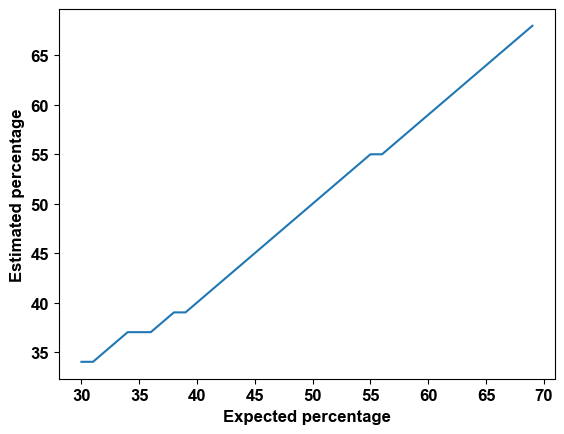

In [6]:
plt.plot(df["percentage"], df["CELL_CYCLE_PERC_DTW"])
plt.xlabel("Expected percentage")
plt.ylabel("Estimated percentage")

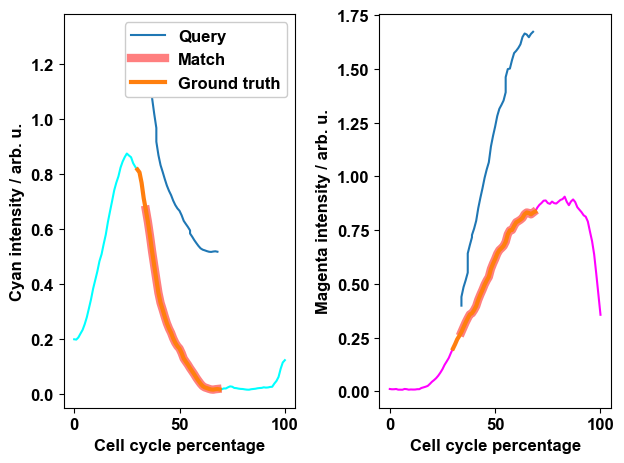

In [7]:
plot_dtw_query_vs_reference(
    reference_df,
    df,
    channels=["cyan", "magenta"],
    ground_truth=reference_df.iloc[start_idx:end_idx],
)
plt.savefig("explain_dtw_query.pdf")
plt.savefig("explain_dtw_query.svg")
plt.show()